# Problem 3:
Dimensionality Reduction with Wine Dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE

# Load the data
wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_3273/1874806279.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x600 with 0 Axes>

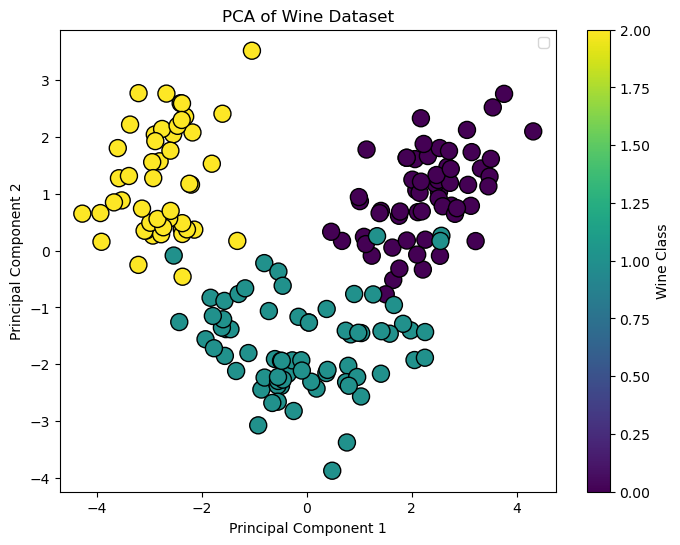

In [2]:
x_scaled = StandardScaler().fit_transform(X)
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor = 'k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Class')
plt.legend()
plt.show()


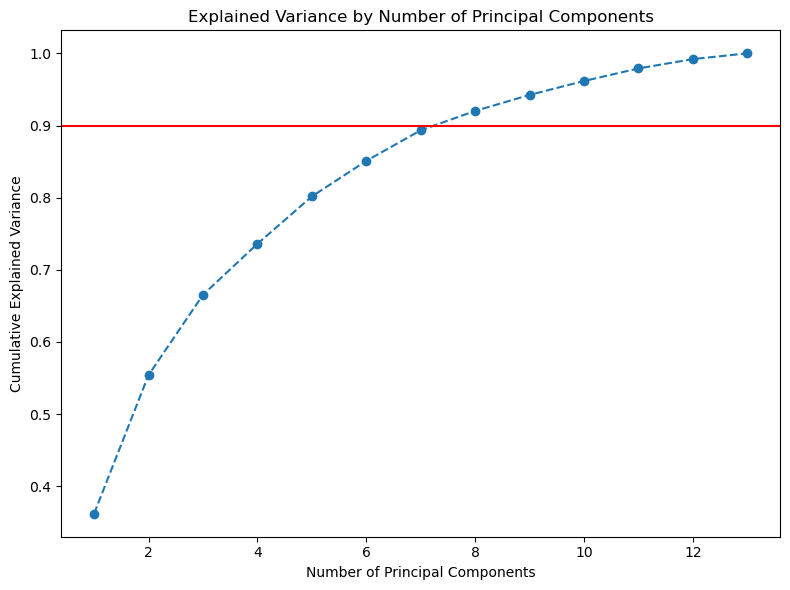

Number of components for 90% variance: 8


In [3]:
# plotting explained variance
pca_full = PCA()
pca_full.fit(x_scaled)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.tight_layout()
plt.show()

n_componets_90 = np.argmax(explained_variance >= 0.9) + 1
print(f"Number of components for 90% variance: {n_componets_90}")




Text(0.5, 1.0, 't-SNE of Wine Dataset')

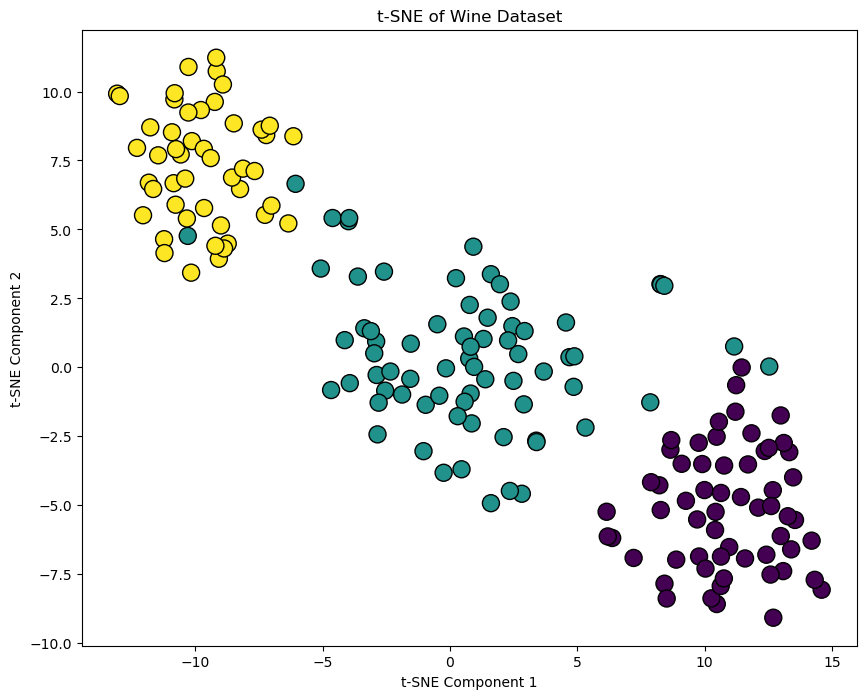

In [4]:
# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x_scaled)

plt.figure(figsize=(10,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Wine Dataset')

 Investigate the original dataset and its statistical properties.

•Calculate and display the mean, median, standard deviation, and range for each
feature in the wine dataset.

•Visualize the distribution of each feature using histograms.

In [5]:
#Ans : 1. Calculate and display the mean, median,
# standard deviation, and range for each feature in the wine dataset.

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


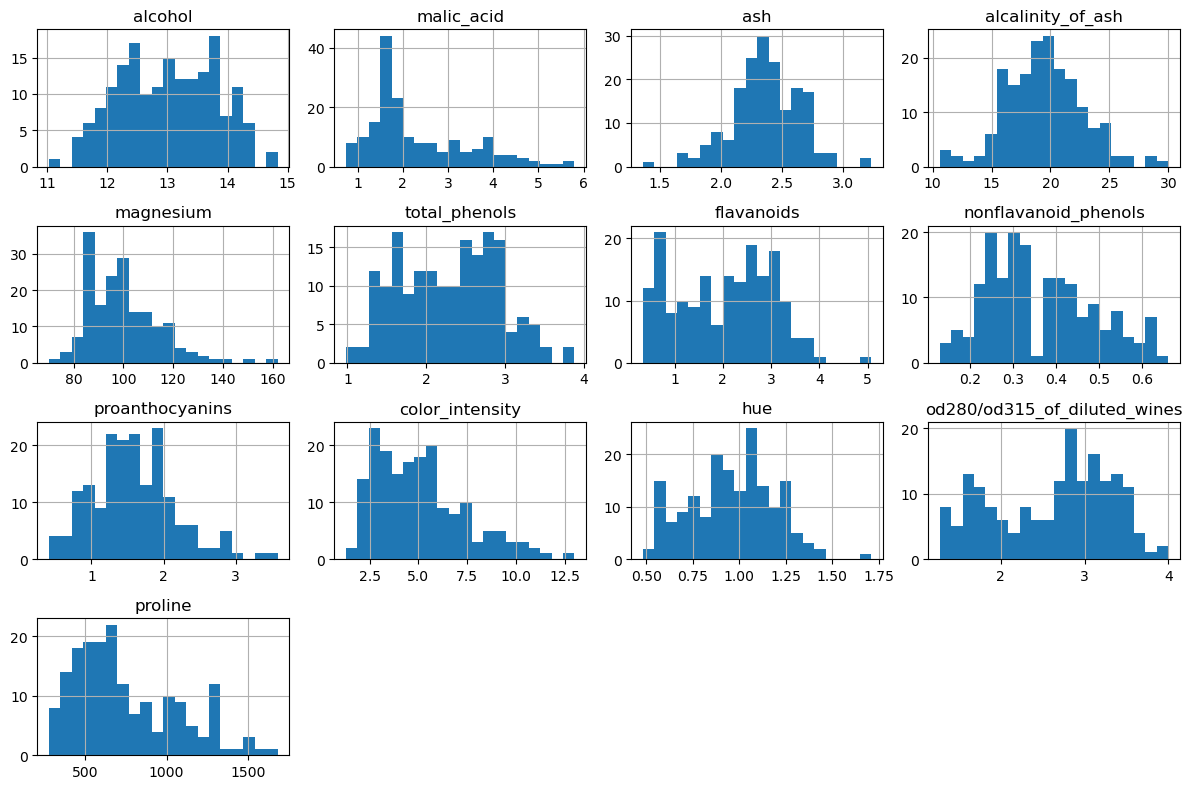

In [6]:
# Ans : 2. Visualize the distribution of each feature using histograms.

df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

### Problem 4. 
Apply Min-Max Scaling to the dataset instead of standard scaling.

Perform PCA and t-SNE on the min-max scaled data.

Visualize the results and compare the clusters with the previously scaled data.

Question for Reflection:

•How does the clustering pattern change between StandardScaler and
MinMaxScaler? Why do you think these changes occur?

ANS : For the PCA, the values of X and Y axes have been reduced from -4 to 4 to -1 to 1. This appear to happen due to the normaliation with MinMaxScaler instead of the StandardScalar. The StandardScalar scales the values with the standard deviation of the data, whereas the MinMaxScaler scales the data with max - min value. 

Since the PCA determines the two principal axis using standard deviations, the pattern doesn't change regardless of the scaler used.

For the t-SNE, the pattern of the datapoints change due to its nonlinear characteristic. Since t-SNE applies a nonlinear transformation to the data, the linear scaling of each data changes the pattern.

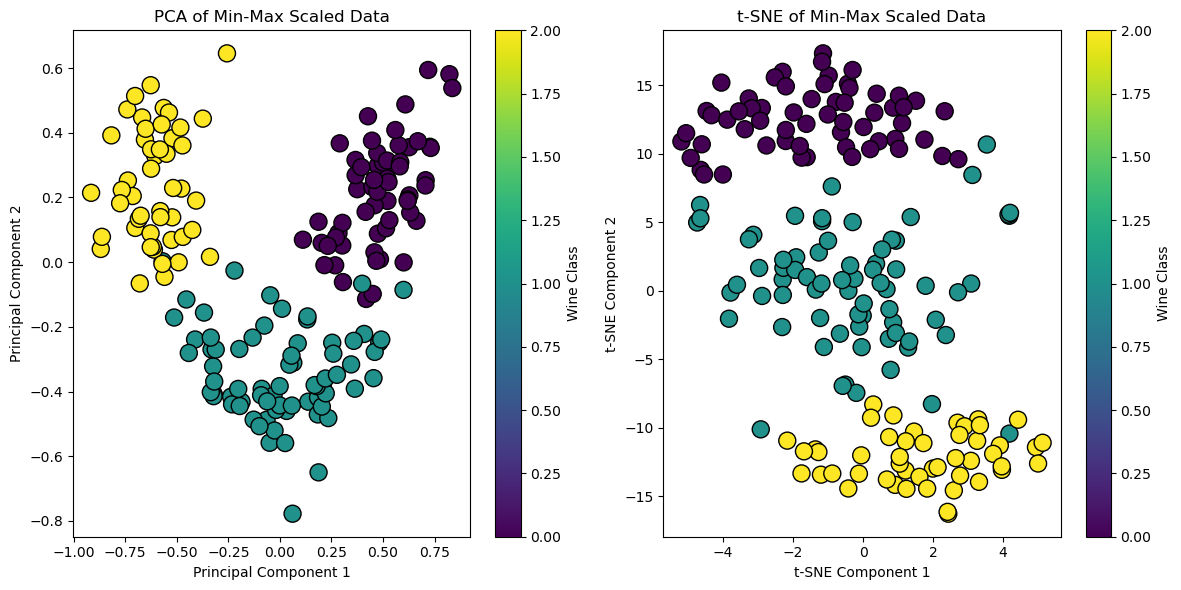

In [7]:
from sklearn.preprocessing import MinMaxScaler
x_minmax = MinMaxScaler().fit_transform(X)

# PCA on min-max scaled data
pca_minmax = PCA(n_components=2)
X_pca_minmax = pca_minmax.fit_transform(x_minmax)

# t-SNE on min-max scaled data
tsne_minmax = TSNE(n_components=2, random_state=42)
X_tsne_minmax = tsne_minmax.fit_transform(x_minmax)

# Visualize the results

fig, ax = plt.subplots(1,2, figsize=(12, 6))

scatter1 = ax[0].scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[0].set_title('PCA of Min-Max Scaled Data')

scatter2 = ax[1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')
ax[1].set_title('t-SNE of Min-Max Scaled Data')
plt.colorbar(scatter1, ax = ax[0], label = 'Wine Class')
plt.colorbar(scatter2, ax = ax[1], label = 'Wine Class')
plt.tight_layout()
plt.show()

### Problem 5.
 t-SNE has several important hyperparameters that can significantly affect the
result. Two key hyperparameters are:

perplexity: This controls the balance between local and global aspects of the data.

learning_rate: This influences how the optimization process converges.

Problem 3-3: Experiment with different values of perplexity and learning_rate.

Test the following combinations of perplexity: [5, 30, 50] and learning_rate: [10, 100, 500].

Visualize and compare the results for each combination.

Hint: Loop through the parameter combinations to generate multiple plots.

Questions for Reflection:

How does changing the perplexity and learning rate affect the resulting t-SNE projection? 
Which parameter combination provides the best separation between the
different wine classes?
Why might that be the case?

Ans : the perplexity decreases the spread of each group. And increasing learning rate makes the istribution of data points look more circular.

The plot with perplexity=30 and learning_rate=100 provides the best separation between different wine classes. This parameter combination demonstrates well-defined clustering of data points for each wine class while minimizing the number of outliers compared to other parameter settings.

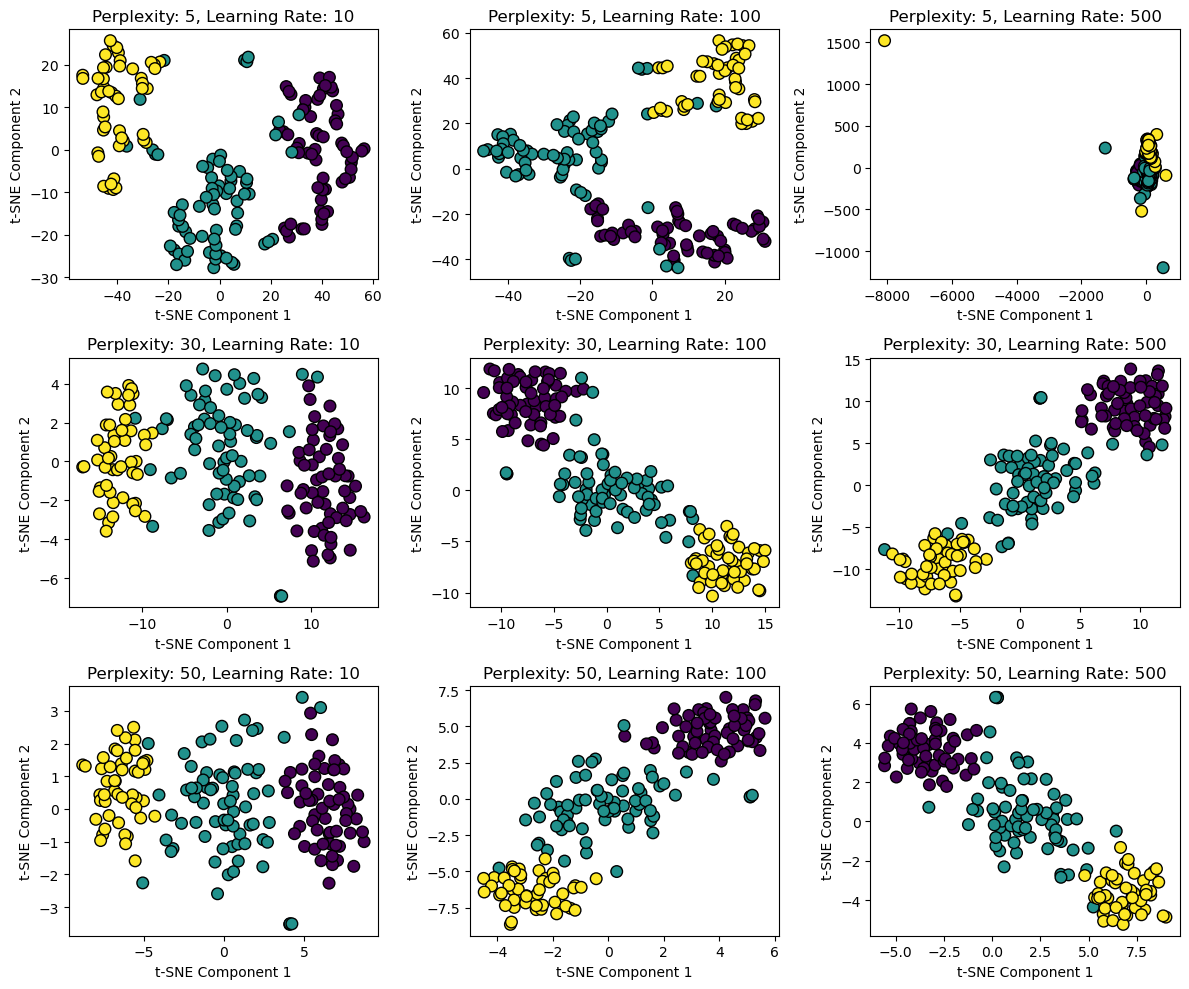

In [17]:
x_scaled = StandardScaler().fit_transform(X)

fig, ax = plt.subplots(3,3,figsize=(12,10))
perplexity = [5,30,50]
learning_rate = [10,100,500]

for i, p in enumerate(perplexity):
    for j, lr in enumerate(learning_rate):
        tsne = TSNE(n_components=2, perplexity=p, learning_rate=lr, random_state=42)
        X_tsne = tsne.fit_transform(x_scaled)
        ax[i,j].scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', edgecolor='k', s=70)
        ax[i,j].set_title(f'Perplexity: {p}, Learning Rate: {lr}')
        ax[i,j].set_xlabel('t-SNE Component 1')
        ax[i,j].set_ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()
